In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import pickle
import random
random.seed(42)
np.random.seed(42)

In [ ]:
#with open("../ressources/final_experiments/result_increasing_size_exp/llm_evaluated_1575.pickle", "rb") as file:
with open("../ressources/final_experiments/result_increasing_size_exp/llm_evaluated_1575.pickle", "rb") as file:
#with open("../ressources/final_experiments/result_guided_exp/llm_evaluated_targeted.pickle", "rb") as file:
#with open("../ressources/final_experiments/result_leaveoneout_exp/llm_evaluated_agg.pickle", "rb") as file:
#with open("../ressources/final_experiments/result_leaveoneout_exp/llm_evaluated_agg.pickle", "rb") as file:
#with open("../ressources/final_experiments/result_guided_exp/llm_evaluated_targeted.pickle", "rb") as file:
#with open("../ressources/final_experiments/result_formal_descriptions_exp/llm_evaluated.pickle", "rb") as file:
#with open("../ressources/llm_evaluated_concat_s14n600_s15n600_train_2024-12-12_16.pickle", "rb") as file:
#with open("../ressources/llm_evaluated_s14_n300_24-12-17.pickle", "rb") as file:
#with open("testdata.pkl", "rb") as file:
#with open("../scripts/llm_evaluated.pickle", "rb") as file:
    original_df = pickle.load(file)

In [4]:
original_df[original_df.type == "Distribution"]["avg_score"].min()

np.float64(-29.58218)

In [5]:
original_df["original_index"] = original_df.index

In [6]:

original_df["type"] = original_df["parameters"].map(lambda x: str(type(x.objective_params).__name__))

original_df["score_diff"] = original_df["llm_avg_score"] - original_df["avg_score"]
original_df['llm_better'] = original_df['score_diff'] > 0

original_df['llm_correct'] = original_df['score_diff'] > -original_df.groupby('type')['avg_score'].transform(lambda x: x.abs().mean()/10.0)
#original_df['llm_correct'] = original_df['score_diff'] > -original_df['avg_score'].map(lambda x: abs(x)/10.0)

def minmax(x):
    return (x - x.min()) / (x.max() - x.min())

original_df['rel_avg_score'] = original_df.groupby('type')['avg_score'].transform(minmax)
original_df['rel_llm_avg_score'] = original_df.groupby('type')['llm_avg_score'].transform(minmax)

In [7]:
# Step 1: Remove NaN and None values
df_cleaned = original_df.dropna()

# Step 2: Remove Inf values
df_cleaned = df_cleaned[~df_cleaned.isin([np.inf, -np.inf]).any(axis=1)]

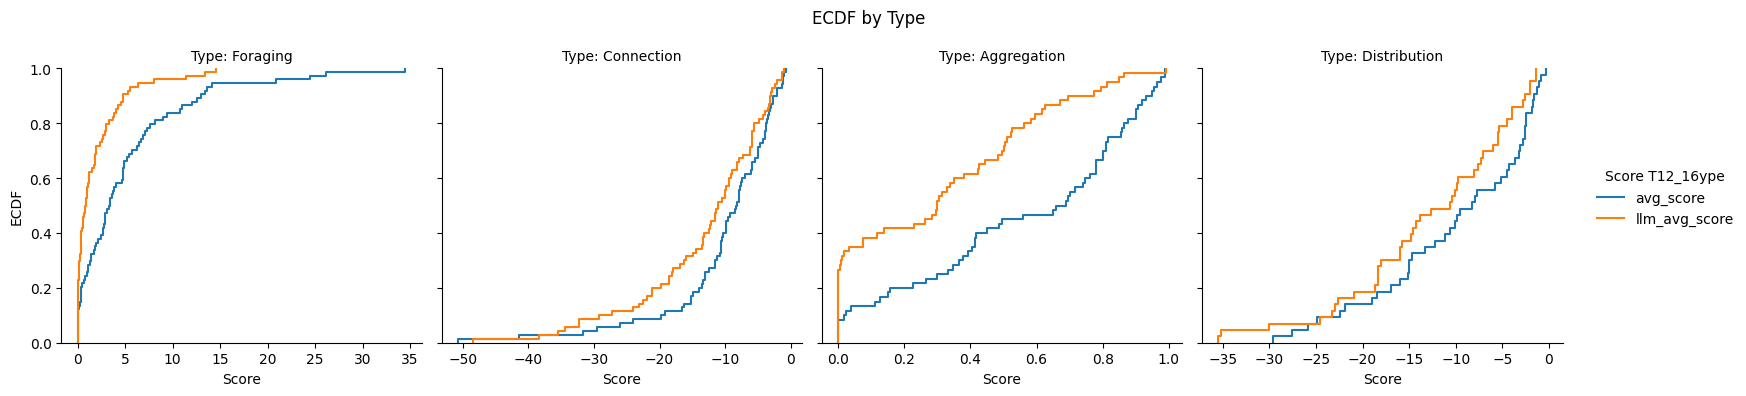

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Melt the DataFrame to long format for seaborn
df_melted = df_cleaned.melt(id_vars=['type'], value_vars=['avg_score', 'llm_avg_score'], 
                             var_name='Score Type', value_name='Score')

# Create a FacetGrid with ECDF plots
g = sns.FacetGrid(df_melted, col='type', hue='Score Type', height=4, aspect=1, sharex=False)
g.map_dataframe(sns.ecdfplot, x='Score', stat='proportion')
g.set_titles(col_template='Type: {col_name}')
g.set_axis_labels('Score', 'ECDF')
# Add a legend
g.add_legend(title='Score T12_16ype')

# Show the plot
g.figure.suptitle('ECDF by Type')
g.tight_layout()
plt.show()


In [9]:
df_cleaned[df_cleaned.type == "Distribution"]["avg_score"].min()

np.float64(-29.58218)

In [10]:
df_melted[df_melted["Score Type"] == "avg_score"][df_melted.type == "Distribution"].min()

/tmp/ipykernel_131225/3556891187.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_melted[df_melted["Score Type"] == "avg_score"][df_melted.type == "Distribution"].min()


type          Distribution
Score Type       avg_score
Score            -29.58218
dtype: object

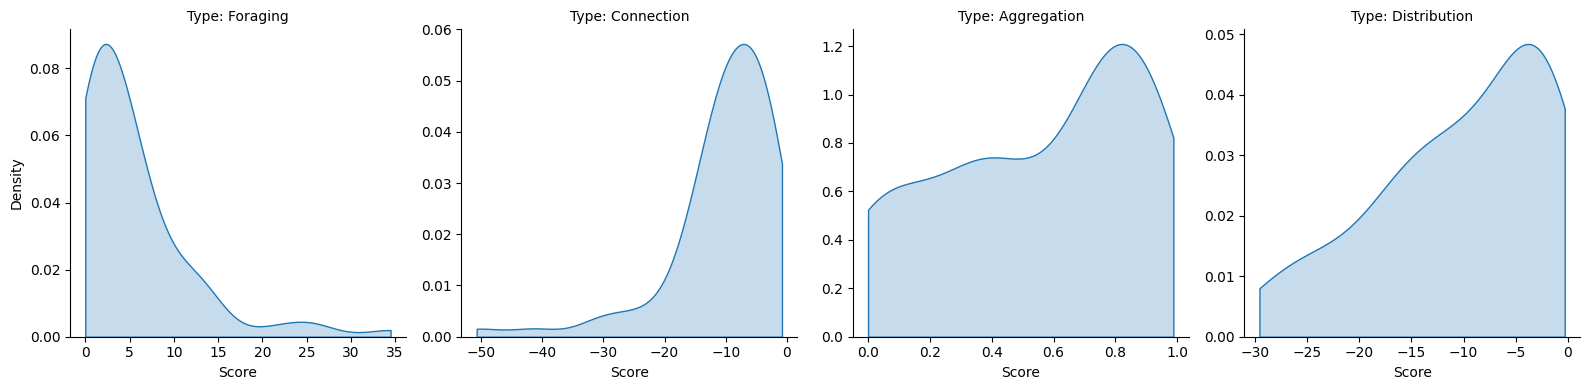

In [11]:
df_melted = df_cleaned.melt(id_vars=['type'], value_vars=['avg_score'], 
#df_melted = df_cleaned.melt(id_vars=['type'], value_vars=['avg_score', 'llm_avg_score'], 
                             var_name='Score Type', value_name='Score')

# Create a FacetGrid with density plots
g = sns.FacetGrid(df_melted, col='type', hue='Score Type', height=4, aspect=1, sharex=False, sharey=False)
g.map_dataframe(sns.kdeplot, x='Score', fill=True, cut=0)  # Use kdeplot for density
g.set_titles(col_template='Type: {col_name}')
g.set_axis_labels('Score', 'Density')


# Add a legend
#g.add_legend(title='Score Type')

# Show the plot
#g.figure.suptitle('Density Estimation by Type')
g.tight_layout()
plt.show()

 two sided violin plot with notched boxplot overlay

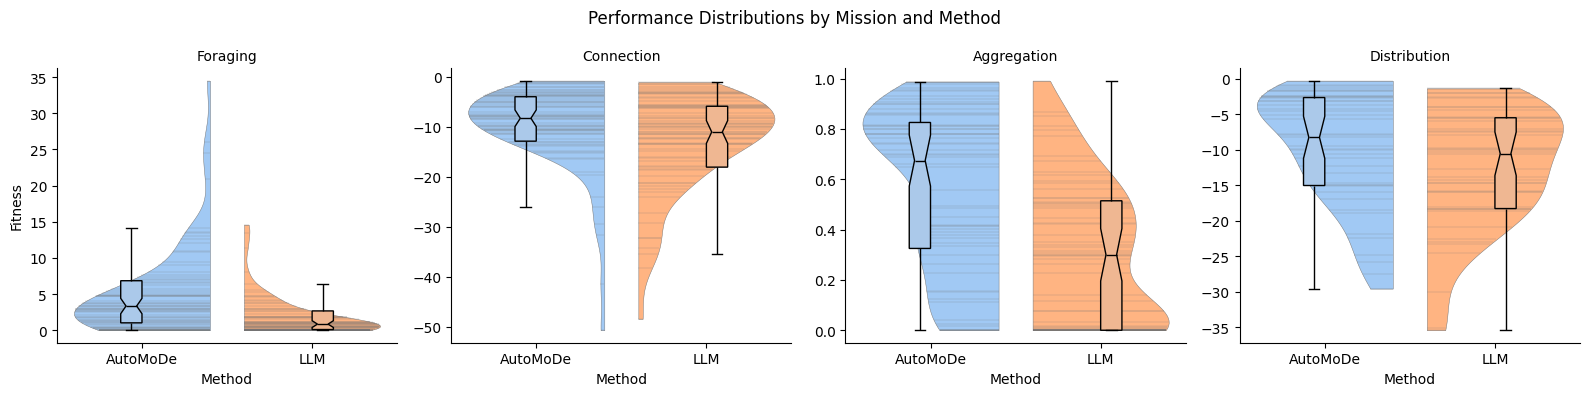

In [12]:

# Melt the DataFrame
df_melted = df_cleaned.melt(id_vars=['type'], value_vars=['avg_score', 'llm_avg_score'], 
                             var_name='Score Type', value_name='Score')

# Create a FacetGrid with violin plots
g = sns.FacetGrid(df_melted, col='type', height=4, aspect=1, sharex=True, sharey=False)
g.map_dataframe(sns.violinplot, x='Score Type', y='Score', hue='Score Type', 
                split=True, inner='stick', density_norm='area', 
                palette="pastel", cut=0, dodge=False,native_scale=True, legend="auto", saturation=1.0, linewidth=0.33)

# Overlay notched boxplots
g.map_dataframe(sns.boxplot, x='Score Type', y='Score', hue='Score Type', 
                dodge=True, width=0.25, palette="pastel", 
                fliersize=0, notch=True, linewidth=1.0, linecolor="black")

# Set titles and labels
g.set_titles(col_template='{col_name}')
g.set_axis_labels('Score Type', 'Score')

# Set y-axis limits to start from zero
# for ax in g.axes.flat:
    # ax.set_ylim(0, ax.get_ylim()[1])  # Set the lower limit to 0
    
g.set_axis_labels('Method', 'Fitness')
label_mapping = {
    'avg_score': 'AutoMoDe',
    'llm_avg_score': 'LLM'
}
# Rename the x-tick labels
for ax in g.axes.flat:
    # Get the current tick positions
    ticks = ax.get_xticks()
    # Set the tick positions
    ax.set_xticks(ticks)
    # Set the new tick labels
    ax.set_xticklabels([label_mapping.get(label, label) for label in ['avg_score', 'llm_avg_score']])


# Add a legend
#g.add_legend(title='Score Type')

# Show the plot
g.figure.suptitle('Performance Distributions by Mission and Method')
g.tight_layout()
plt.show()

In [13]:
descriptive_stats = df_melted.groupby(['type', 'Score Type'])['Score'].describe()
descriptive_stats

count       mean       std       min        25%  \
type         Score Type                                                       
Aggregation  avg_score       60.0   0.557214  0.328317   0.00000   0.325000   
             llm_avg_score   60.0   0.307450  0.289302   0.00000   0.000000   
Connection   avg_score       70.0 -10.270778  9.018830 -50.72425 -12.879147   
             llm_avg_score   70.0 -13.242303  9.967100 -48.45403 -18.076310   
Distribution avg_score       43.0 -10.095508  8.280468 -29.58218 -15.056695   
             llm_avg_score   43.0 -12.842702  8.858018 -35.45303 -18.304315   
Foraging     avg_score       74.0   5.306757  6.491012   0.00000   1.025000   
             llm_avg_score   74.0   1.944595  2.933236   0.00000   0.100000   

                                  50%       75%        max  
type         Score Type                                     
Aggregation  avg_score       0.674118  0.825428   0.987500  
             llm_avg_score   0.300000  0.514286   0.990909  
Connection   avg_score      -8.293519 -3.984874  -0.798263  
             llm_avg_score -11.044019 -5.894131  -1.060899  
Distribution avg_score      -8.273917 -2.664464  -0.303202  
             llm_avg_score -10.579020 -5.510333  -1.368099  
Foraging     avg_score       3.350000  6.850000  34.500000  
             llm_avg_score   0.850000  2.675000  14.600000

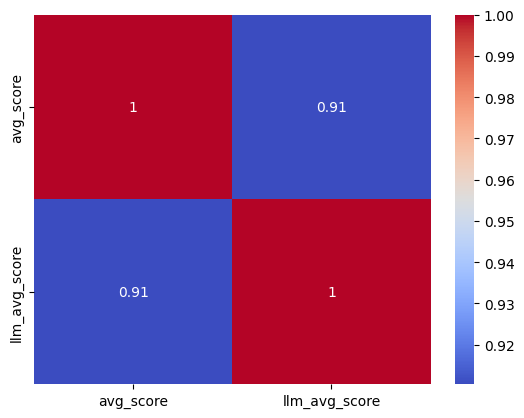

In [14]:
corrmat = df_cleaned[["avg_score","llm_avg_score"]].corr(method="spearman")

sns.heatmap(corrmat, annot=True, cmap='coolwarm')
plt.show()

/tmp/ipykernel_131225/3496947997.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_type = df.groupby('type').apply(lambda x: x[[x_key, y_key]].corr().iloc[0, 1])


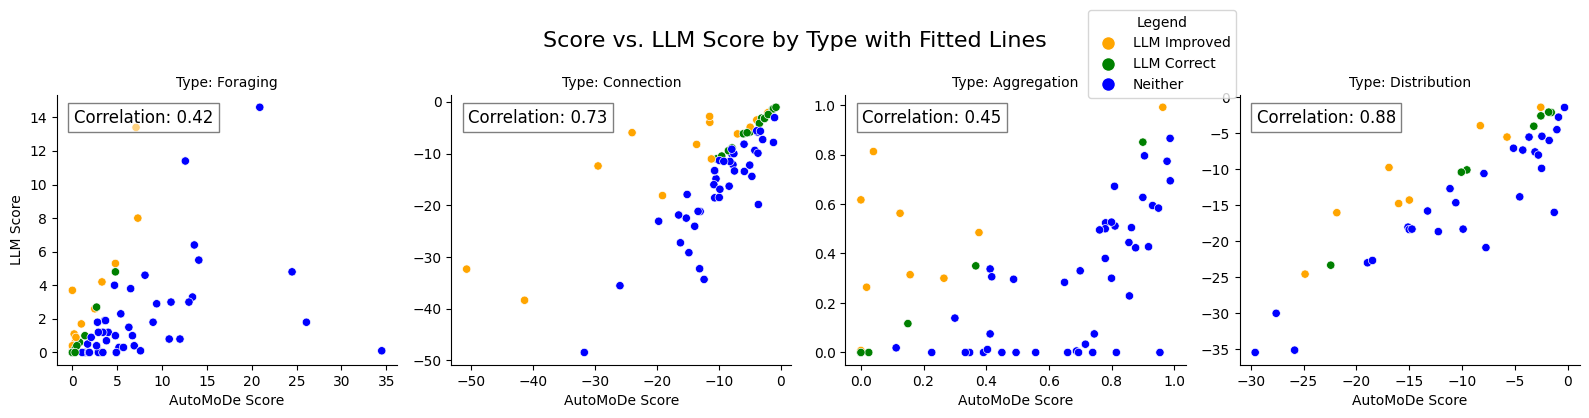

In [15]:
df = df_cleaned
type_order = list(df["type"].unique())
g = sns.FacetGrid(df, col='type', height=4, aspect=1, sharex=False, col_order=type_order, sharey=False)
x_key = "avg_score"
y_key="llm_avg_score"

# Create a new column for color based on llm_better and llm_correct
def color_condition(row):
    if row['llm_better']:
        return 'orange'  # Color for llm_better being True
    elif row['llm_correct']:
        return 'green'  # Color for llm_correct being True
    else:
        return 'blue'  # Default color

df['color'] = df.apply(color_condition, axis=1)

# Map the regression plot to the FacetGrid
g.map_dataframe(sns.scatterplot, x=x_key, y=y_key, hue='color', palette={'green': 'green', 'orange': 'orange', 'blue': 'blue'})
#g.map_dataframe(sns.regplot, x=x_key, y=y_key, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}, scatter=False)

# Calculate correlation by type
correlation_by_type = df.groupby('type').apply(lambda x: x[[x_key, y_key]].corr().iloc[0, 1])

# Add correlation text to each facet in the correct order
for ax, type_name in zip(g.axes.flat, type_order):
    corr_value = correlation_by_type[type_name]
    ax.text(0.05, 0.95, f'Correlation: {corr_value:.2f}', transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Add titles and labels
g.set_titles(col_template='Type: {col_name}')
g.set_axis_labels('AutoMoDe Score', 'LLM Score')
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='LLM Improved', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='LLM Correct', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Neither', markerfacecolor='blue', markersize=10)
]

g.fig.legend(handles=handles, loc='upper right',bbox_to_anchor=(0.78, 1.05), title='Legend')
# Show the plot
g.figure.suptitle('Score vs. LLM Score by Type with Fitted Lines', fontsize=16)
g.tight_layout()
g.fig.subplots_adjust(top=0.82)  # Adjust the title to fit
plt.show()

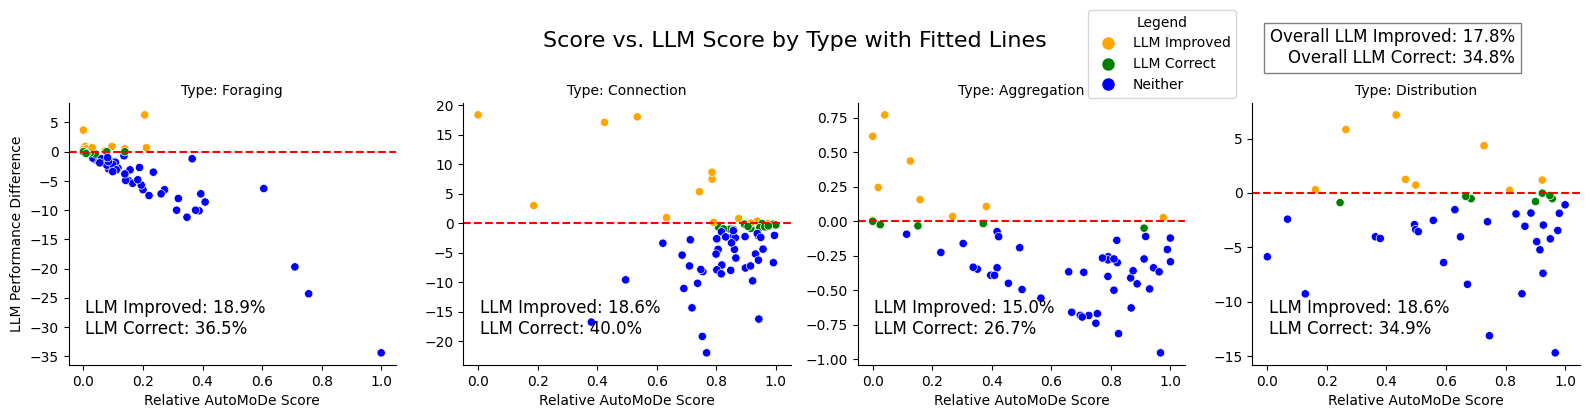

In [16]:
# Calculate the mean ratios for llm_better and llm_correct
ratios = df.groupby('type').agg(
    llm_better_mean=('llm_better', 'mean'),
    llm_correct_mean=('llm_correct', 'mean')
).reset_index()

# Convert to percentage
ratios['llm_better_ratio'] = ratios['llm_better_mean'] * 100
ratios['llm_correct_ratio'] = ratios['llm_correct_mean'] * 100

# Create the FacetGrid
type_order = list(df["type"].unique())
g = sns.FacetGrid(df, col='type', height=4, aspect=1, sharex=False, col_order=type_order, sharey=False)

# Create a new column for color based on llm_better and llm_correct
def color_condition(row):
    if row['llm_better']:
        return 'orange'  # Color for llm_better being True
    elif row['llm_correct']:
        return 'green'  # Color for llm_correct being True
    else:
        return 'blue'  # Default color

df['color'] = df.apply(color_condition, axis=1)

# Calculate total (unaggregated) ratios
total_llm_better_ratio = df['llm_better'].mean() * 100
total_llm_correct_ratio = df['llm_correct'].mean() * 100

# Map the scatter plot to the FacetGrid with color based on the new column
g.map_dataframe(sns.scatterplot, x='rel_avg_score', y='score_diff', hue='color', palette={'green': 'green', 'orange': 'orange', 'blue': 'blue'})

# Add horizontal line at y=0
for ax in g.axes.flat:
    ax.axhline(0, color='red', linestyle='--')  # Customize the color and linestyle

# Add titles and labels
g.set_titles(col_template='Type: {col_name}')
g.set_axis_labels('Relative AutoMoDe Score', 'LLM Performance Difference')

# Add the ratio text to each facet
for ax, type_name in zip(g.axes.flat, type_order):
    llm_better_value = ratios.loc[ratios['type'] == type_name, 'llm_better_ratio'].values[0]
    llm_correct_value = ratios.loc[ratios['type'] == type_name, 'llm_correct_ratio'].values[0]
    ax.text(0.05, 0.25, f'LLM Improved: {llm_better_value:.1f}%\nLLM Correct: {llm_correct_value:.1f}%', 
            transform=ax.transAxes, fontsize=12, verticalalignment='top')

g.fig.text(0.95, 0.9, f'Overall LLM Improved: {total_llm_better_ratio:.1f}%\nOverall LLM Correct: {total_llm_correct_ratio:.1f}%', 
           ha='right', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
# Create a custom legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='LLM Improved', markerfacecolor='orange', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='LLM Correct', markerfacecolor='green', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Neither', markerfacecolor='blue', markersize=10)
]

g.fig.legend(handles=handles, loc='upper right',bbox_to_anchor=(0.78, 1.05), title='Legend')
# Show the plot
g.figure.suptitle('Score vs. LLM Score by Type with Fitted Lines', fontsize=16)
g.tight_layout()
g.fig.subplots_adjust(top=0.8)  # Adjust the title to fit
plt.show()

In [17]:
df.shape

(247, 22)

In [18]:
i= 0
#r = df[(df["score_diff"] > -0.2 )& (df["type"] == "Aggregation")].iloc[i][["type","avg_score", "llm_avg_score","score_diff", "llm_better", "llm_correct", "index", "original_index"]]#

#r




In [19]:
#original_df.iloc[r.original_index]

In [20]:
df.groupby('type').agg(
    llm_better_mean=('llm_better', 'mean'),
    llm_correct_mean=('llm_correct', 'mean')
).reset_index()

,type,llm_better_mean,llm_correct_mean
0,Aggregation,0.150000,0.266667
1,Connection,0.185714,0.400000
2,Distribution,0.186047,0.348837
3,Foraging,0.189189,0.364865


In [21]:
df.groupby('type').agg(
    llm_avg_score=('llm_avg_score', 'mean'),
    automode_avg_score=('avg_score', 'mean')
).reset_index()

,type,llm_avg_score,automode_avg_score
0,Aggregation,0.307450,0.557214
1,Connection,-13.242303,-10.270778
2,Distribution,-12.842702,-10.095508
3,Foraging,1.944595,5.306757


In [22]:
df.groupby('type').agg(
    llm_med_score=('llm_avg_score', 'median'),
    automode_med_score=('avg_score', 'median')
).reset_index()

,type,llm_med_score,automode_med_score
0,Aggregation,0.300000,0.674118
1,Connection,-11.044019,-8.293519
2,Distribution,-10.579020,-8.273917
3,Foraging,0.850000,3.350000


### statistical comparison wrt. hypothesis llm is at least as good as automode

In [23]:
import pandas as pd
from scipy import stats
import numpy as np

def compare_methods(df, method_col, score_col, method_A, method_B):
    # Separate scores for each method
    scores_A = df[df[method_col] == method_A][score_col]
    scores_B = df[df[method_col] == method_B][score_col]


    # Calculate means and standard deviations
    mean_A = scores_A.mean()
    mean_B = scores_B.mean()
    std_A = scores_A.std(ddof=1)  # Sample standard deviation
    std_B = scores_B.std(ddof=1)  # Sample standard deviation
    n_A = len(scores_A)
    n_B = len(scores_B)

    # Calculate pooled standard deviation
    SD_pooled = np.sqrt(((n_A - 1) * std_A**2 + (n_B - 1) * std_B**2) / (n_A + n_B - 2))

    # Calculate Cohen's d
    cohens_d = (mean_B - mean_A) / SD_pooled if SD_pooled != 0 else np.nan

    # Perform t-test
    t_stat, p_value = stats.ttest_ind(scores_A, scores_B, alternative='greater') # greater less or two-sided
    
    # method A will be llms method B will be automode
    # null hypothesis: method A is worse than method B     
    # alternative hypothesis: method A is eq or better than method B
    stat, pval = stats.wilcoxon(scores_A, scores_B, alternative="greater")

    # Prepare results
    results = {
        'Mean Score of A': mean_A.item(),
        'Mean Score of B': mean_B.item(),
        'Mean Difference': (mean_B - mean_A).item(),
        'T-statistic': t_stat.item(),
        'P-value': p_value.item(),
        'Cohen\'s d': cohens_d.item(),
        'Wilcoxon Statistic': stat.item(),
        'Wilvoxon P-value': pval.item()
    }

    return results


in the following we define method A as llm and method B as avg_score (automode)

In [24]:
def convert_to_comparison_df(original_df):
    # Create a new DataFrame for comparison
    comparison_data = {
        'Method': [],
        'Score': []
    }
    
    # Append Method A scores (avg_score)
    comparison_data['Method'].extend(['A'] * len(original_df))
    comparison_data['Score'].extend(original_df['llm_avg_score'].tolist())
    
    # Append Method B scores (llm_avg_score)
    comparison_data['Method'].extend(['B'] * len(original_df))
    comparison_data['Score'].extend(original_df['avg_score'].tolist())
    
    # Create a new DataFrame
    comparison_df = pd.DataFrame(comparison_data)
    
    return comparison_df

In [25]:
convert_to_comparison_df(df)

,Method,Score
0,A,1.900000
1,A,0.100000
2,A,-6.210486
3,A,0.000000
4,A,4.000000
...,...,...
489,B,20.900000
490,B,2.800000
491,B,-1.804289
492,B,-7.740851


In [26]:
compare_methods(convert_to_comparison_df(df), 'Method', 'Score', 'A', 'B')

{'Mean Score of A': -5.331377870769232,
 'Mean Score of B': -2.943030109068826,
 'Mean Difference': 2.388347761700406,
 'T-statistic': -2.7237291121255724,
 'P-value': 0.996657762980371,
 "Cohen's d": 0.2450927326154197,
 'Wilcoxon Statistic': 4128.5,
 'Wilvoxon P-value': 1.0}

In [27]:
def apply_comparison(group):
        comparison_df = convert_to_comparison_df(group)
        return compare_methods(comparison_df, "Method", "Score", "A", "B")

    # Group by the type column and apply the comparison functionres = 
res = df.groupby("type").apply(apply_comparison)
results = {name: result for name, result in res.items()}
results

/tmp/ipykernel_131225/1273810384.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  res = df.groupby("type").apply(apply_comparison)


{'Aggregation': {'Mean Score of A': 0.30745048366666666,
  'Mean Score of B': 0.5572142959999999,
  'Mean Difference': 0.24976381233333328,
  'T-statistic': -4.421148545380612,
  'P-value': 0.9999890200333006,
  "Cohen's d": 0.8071875961287047,
  'Wilcoxon Statistic': 198.0,
  'Wilvoxon P-value': 0.9999997036232467},
 'Connection': {'Mean Score of A': -13.242302698571427,
  'Mean Score of B': -10.270777827142856,
  'Mean Difference': 2.9715248714285707,
  'T-statistic': -1.8495687611878135,
  'P-value': 0.9667425253212889,
  "Cohen's d": 0.31263418158616646,
  'Wilcoxon Statistic': 444.0,
  'Wilvoxon P-value': 0.9999985156085438},
 'Distribution': {'Mean Score of A': -12.842701725581396,
  'Mean Score of B': -10.09550806511628,
  'Mean Difference': 2.7471936604651166,
  'T-statistic': -1.4856605376265208,
  'P-value': 0.929443764409718,
  "Cohen's d": 0.320405791622358,
  'Wilcoxon Statistic': 141.0,
  'Wilvoxon P-value': 0.9999893181566222},
 'Foraging': {'Mean Score of A': 1.94459459

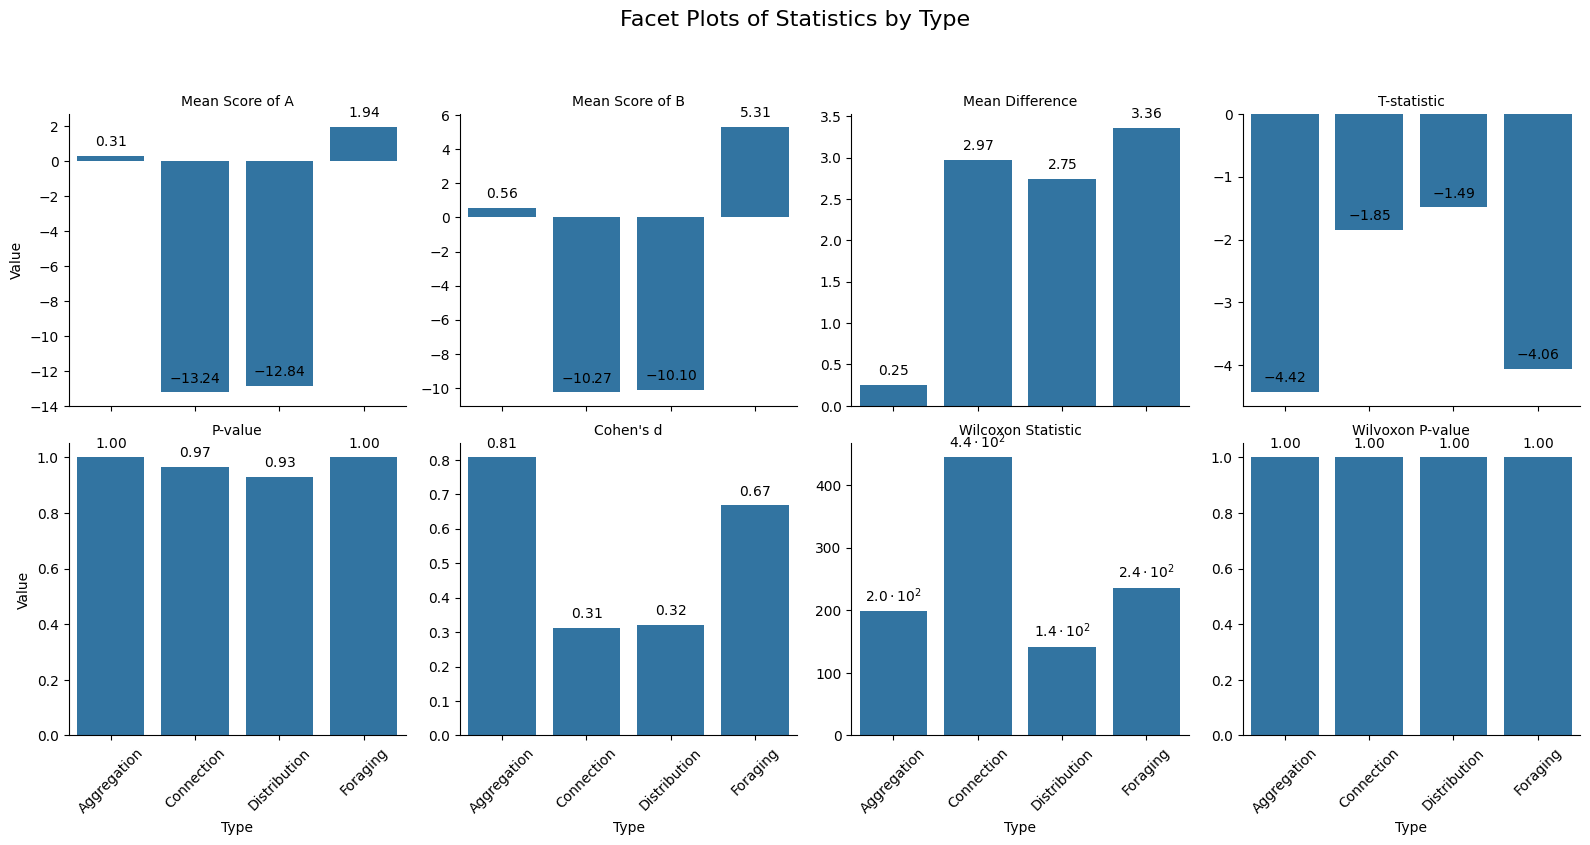

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame.from_dict({k: v for k, v in results.items()}, orient='index')

# Reset index to have 'Type' as a column
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Type'}, inplace=True)

# Melt the DataFrame for easier plotting
melted_df = results_df.melt(id_vars='Type', value_vars=['Mean Score of A', 'Mean Score of B', 'Mean Difference', 'T-statistic', 'P-value', "Cohen's d", "Wilcoxon Statistic", 'Wilvoxon P-value'],
                             var_name='Statistic', value_name='Value')

# Create a FacetGrid
g = sns.FacetGrid(melted_df, col='Statistic', col_wrap=4, height=4, sharey=False)
g.map(sns.barplot, 'Type', 'Value', order=results_df['Type'])

# Function to annotate bars with their values in LaTeX-style exponential format
def format_exponential(number):
    """Format a number in LaTeX-style exponential notation."""
    if number == 0:
        return r'$0$'
    
    # Calculate the exponent and coefficient
    exponent = int(np.floor(np.log10(abs(number))))
    coefficient = number / 10**exponent
    
    if abs(exponent) <= 1:
        return r'${:.2f}$'.format(number)
    # Format the string in LaTeX style
    formatted_string = r'${:.1f} \cdot 10^{{{}}}$'.format(coefficient, exponent)
    
    return formatted_string

def annotate_bars(ax):
    for p in ax.patches:
        height = p.get_height()

        ax.annotate(format_exponential(height),  # LaTeX-style formatting
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', 
                    fontsize=10, 
                    xytext=(0, 5),  # Offset text
                    textcoords='offset points')

# Apply the annotation function to each facet
for ax in g.axes.flatten():
    annotate_bars(ax)

# Set x-tick labels and titles
g.set_xticklabels(rotation=45)
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Type", "Value")
g.fig.suptitle('Facet Plots of Statistics by Type', fontsize=16)
plt.subplots_adjust(top=0.85)  # Adjust title position

# Ensure x-tick labels correspond to actual types
for ax in g.axes.flatten():
    ax.set_xticks(range(len(results_df['Type'])))
    ax.set_xticklabels(results_df['Type'], rotation=45)

plt.show()


small p values indicate weak support for the null hypothesis (llms are worse than automode) so that the alternative (llms are eq or better, here) needs to be accepted.llm_better_value
high values just mean we cannot accept the alternative hypothesis. We could invert the direction of the test to accept that but doing that after the test would be considered cheating and might influence the result.

In [29]:


format_exponential(-9.7)

'$-9.70$'

TODO was ist das Ergebnis bei syntethischen Daten (verschiedene distributionen und gleich)

In [30]:
def sample(mu=0, sigma=1, n_samples=3500):
    samples = np.random.normal(mu, sigma, n_samples)
    return samples

def vis_samples(samples):
    # Set up the matplotlib figure
    plt.figure(figsize=(12, 6))

    # Histogram and density for the original normal distribution
    plt.subplot(1, 2, 1)
    sns.histplot(samples, bins=30, kde=True, color='blue', stat='density', label='Original Normal Distribution', alpha=0.6)
    plt.title('Original Normal Distribution')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

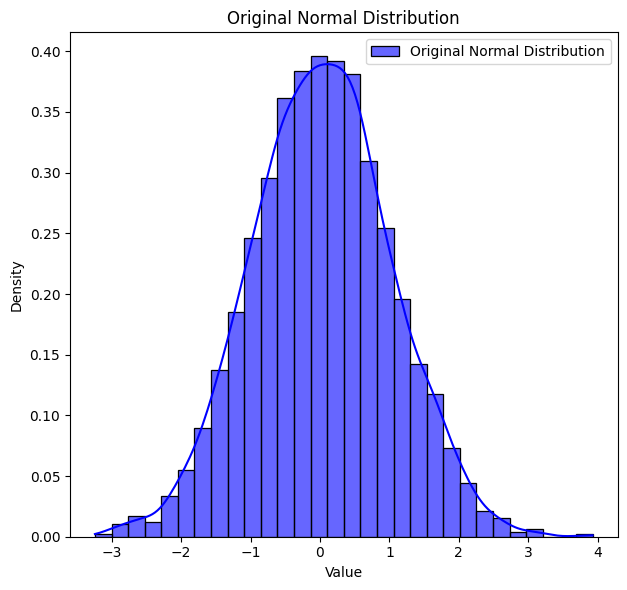

In [31]:
samples = sample(mu=0,sigma=1,n_samples=3500)
vis_samples(samples)

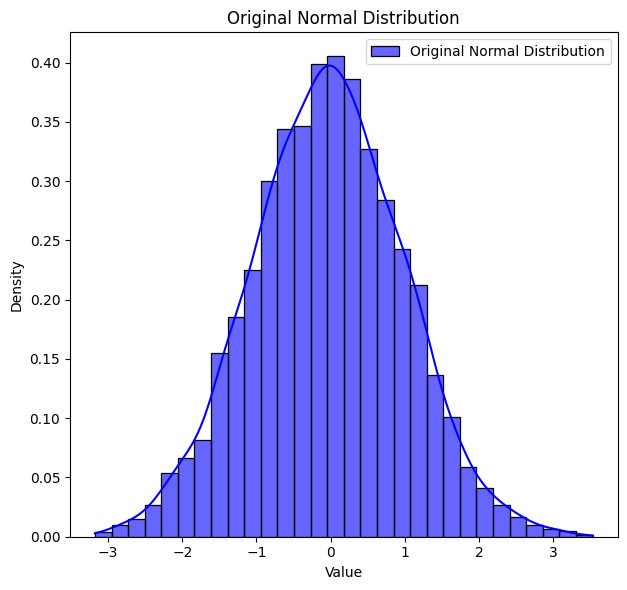

In [32]:
samples2 = sample(mu=0,sigma=1,n_samples=3500)
vis_samples(samples2)

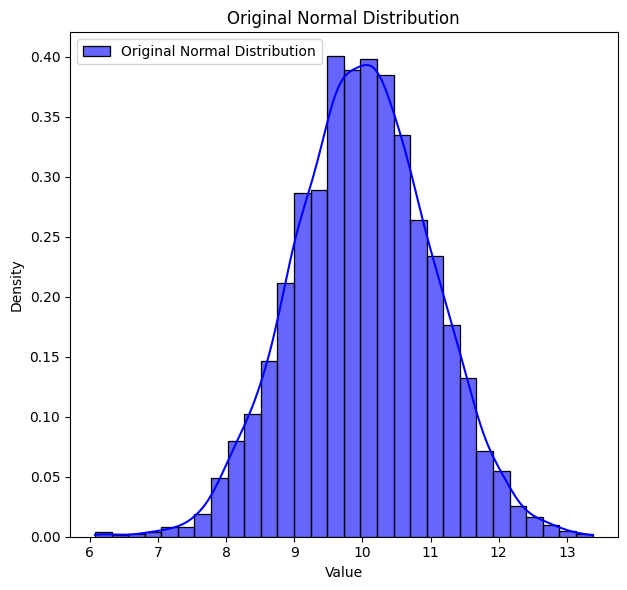

In [33]:
shifted_samples = sample(mu=10,sigma=1,n_samples=3500)
vis_samples(shifted_samples)

samples and samples two are from the same distribution. shifted_samples has a higher mean

In [34]:
# null hypothesis: method A is as good as method B     
# alternative hypothesis: method A is different from method B
stat, pval = stats.wilcoxon(samples, samples2, alternative="two-sided") 
stat, pval

(np.float64(2904309.0), np.float64(0.007801110040477061))

In [35]:
# null hypothesis: method A is at worse than method B     
# alternative hypothesis: method A is equal or better than method B
stat, pval = stats.wilcoxon(samples, samples2, alternative="greater")
stat, pval

(np.float64(3222441.0), np.float64(0.0039005550202385305))

In [36]:
# null hypothesis: method A a is as good better than method b    
# alternative hypothesis: method A is worse than method b
stat, pval = stats.wilcoxon(samples, samples2, alternative="less")
stat, pval

(np.float64(3222441.0), np.float64(0.9960994449797614))

In [37]:
# null hypothesis: method A is worse than method B     
# alternative hypothesis: method A is eq or better than method B
stat, pval = stats.wilcoxon(samples, shifted_samples, alternative="greater")
stat, pval

(np.float64(0.0), np.float64(1.0))

In [38]:
# null hypothesis: method A is eq or better than method B
# alternative hypothesis:  method A is worse
stat, pval = stats.wilcoxon(samples, shifted_samples, alternative="less")
stat, pval

(np.float64(0.0), np.float64(0.0))